<a href="https://colab.research.google.com/github/rubathecoder/Ruba-AIML-Portfolio-/blob/main/Heart_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

The goal is to analyze and predict heart rate (and more broadly, heart disease risk within ten years) based on patient features from the Framingham dataset. This supports early detection and risk assessment for cardiovascular conditions.​

**Project Objectives**

* Perform extensive exploratory data analysis (EDA), including visualizing and imputing missing values.

* Identify statistical relationships and correlations among features.

* Define feature and target variables for prediction.

* Prepare and preprocess data for modeling (fill missing values, scale features, etc.).

* Train predictive models (initially logistic regression) to estimate heart disease risk.

* Evaluate model performance using accuracy, confusion matrix, and classification reports.

* Discuss conclusions and future recommendations, such as model tuning or switching to more sophisticated algorithms.​

**Dataset Structure**
The dataset (framingham.csv) contains the following columns:

Demographics: male, age, education

Smoking status: currentSmoker, cigsPerDay

Medical history: BPMeds, prevalentStroke, prevalentHyp, diabetes

Physiology: totChol, sysBP, diaBP, BMI, heartRate, glucose

Target: TenYearCHD (risk of coronary heart disease in ten years)​

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#data loading
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/HEART RATE PREDICTION/Data/framingham.csv')
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

EDS-Exploratory Data Analysis

In [25]:
#Basic EDA
df.shape#rows & columns count


(4240, 16)

In [26]:
df.info()#data types & non- null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [27]:
df.head()#preview dat

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [28]:
df.tail()#preview data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [29]:
df.columns#list of columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [30]:
df.describe()#summary stats

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [31]:
df.isnull().sum()#check missing /null values and sums them up

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


<Axes: >

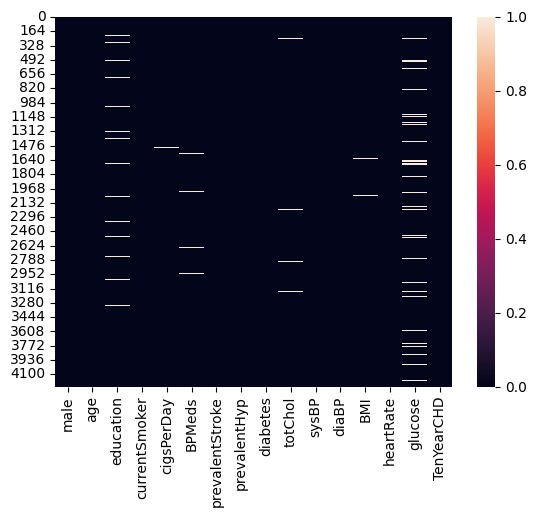

In [33]:
#In-Depth EDA
import seaborn as sns
sns.heatmap(df.isnull())#Visualizing missing values

# **Feature Engineering**  -feature selection, transformation, and creation of new variables

In [36]:
import pandas as pd
import numpy as np
# Select input feature columns
feature_cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
                'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
                'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [34]:
# Define the target variable
target_col = 'TenYearCHD'

In [37]:
# Create a working dataframe with selected features and target
df_features = df[feature_cols + [target_col]].copy()

In [38]:
#Create age groups (bins)
bins = [29, 39, 49, 59, 69, 79, 89, 99]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df_features['age_group'] = pd.cut(df_features['age'], bins=bins, labels=labels, right=False)

In [39]:
# Create BMI categories (underweight, normal, overweight, obese)
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df_features['bmi_category'] = pd.cut(df_features['BMI'], bins=bmi_bins, labels=bmi_labels, right=True)

In [41]:
#Combine smoker info into risk category
def smoker_risk(row):
    if row['currentSmoker'] == 1 and row['cigsPerDay'] > 10:
        return 'High'
    elif row['currentSmoker'] == 1:
        return 'Medium'
    else:
        return 'Low'
df_features['smoker_risk'] = df_features.apply(smoker_risk, axis=1)

In [42]:
# Drop original 'cigsPerDay' if using smoker_risk as aggregate
df_features = df_features.drop(columns=['cigsPerDay'])

In [43]:
# Check the engineered dataframe head
df_features.head()

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_group,bmi_category,smoker_risk
0,1,39,4.0,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,40-49,Overweight,Low
1,0,46,2.0,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40-49,Overweight,Low
2,1,48,1.0,1,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,40-49,Overweight,High
3,0,61,3.0,1,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,60-69,Overweight,High
4,0,46,3.0,1,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,40-49,Normal,High


Our feature engineering has been successfully implemented—our dataframe now includes both original and newly created features like age_group, bmi_category, and smoker_risk.

Encode Categorical Variables -our categorical features (such as age_group, bmi_category, smoker_risk) must be encoded before model training.

In [44]:
from sklearn.preprocessing import OneHotEncoder

# List of categorical columns to encode
categorical_cols = ['age_group', 'bmi_category', 'smoker_risk']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_features, columns=categorical_cols, drop_first=True)

# Check the resulting dataframe
df_encoded.head()


,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,age_group_50-59,age_group_60-69,age_group_70-79,age_group_80-89,age_group_90+,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,smoker_risk_Low,smoker_risk_Medium
0,1,39,4.0,0,0.0,0,0,0,195.0,106.0,...,False,False,False,False,False,False,True,False,True,False
1,0,46,2.0,0,0.0,0,0,0,250.0,121.0,...,False,False,False,False,False,False,True,False,True,False
2,1,48,1.0,1,0.0,0,0,0,245.0,127.5,...,False,False,False,False,False,False,True,False,False,False
3,0,61,3.0,1,0.0,0,1,0,225.0,150.0,...,False,True,False,False,False,False,True,False,False,False
4,0,46,3.0,1,0.0,0,0,0,285.0,130.0,...,False,False,False,False,False,True,False,False,False,False


This code uses pd.get_dummies from pandas to one-hot encode categorical columns and drops one dummy column per category to avoid multicollinearity.

The df_encoded dataframe is now fully numeric and ready for model splitting/scaling.

* Separates your predictors and outcome.

In [47]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('TenYearCHD', axis=1)
y = df_encoded['TenYearCHD']

* Splits into train/test sets with stratification to preserve class balance.

In [48]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

* Prints shape to confirm split success.

In [49]:
# Check the shape of splits
print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Train target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Train features shape: (3392, 25)
Test features shape: (848, 25)
Train target shape: (3392,)
Test target shape: (848,)


(data is now split into training and test sets)

Impute missing values

In [55]:
from sklearn.impute import SimpleImputer

# Initialize the Imputer (median is robust for most clinical data)
imputer = SimpleImputer(strategy='median')

# Fit on training data and transform both train and test features
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


**Feature Scaling** -applying standard scaling (using StandardScaler) to your numeric features, using only training set statistics for fit:

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [62]:
# we now have X_train_scaled and X_test_scaled as scaled arrays, ready for modeling.
print("Scaling complete. X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

Scaling complete. X_train_scaled shape: (3392, 25)
X_test_scaled shape: (848, 25)


-our features have mean 0 and variance 1 for optimal model performance, without data leakage.

Now that our data is scaled and ready, the next logical step is to train a predictive model.Lets train as highlighted in our project and notebook, logistic regression model for heart disease risk prediction.

Let us fit the model on our training data and make predictions on our test set:

In [64]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg = LogisticRegression(max_iter=1000, random_state=42)

In [65]:
# Fit the model on the scaled training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Our model is now trained. The next essential step is to evaluate its performance on your test data. This typically includes accuracy, confusion matrix, and a classification report.

#Model Evaluation

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [67]:
# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

In [68]:
# Print accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.8443396226415094


In [69]:
# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[710   9]
 [123   6]]


In [70]:
# Print classification report (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       719
           1       0.40      0.05      0.08       129

    accuracy                           0.84       848
   macro avg       0.63      0.52      0.50       848
weighted avg       0.78      0.84      0.79       848



# **Project Conclusion and Report**

**Project Overview**

The project uses the Framingham dataset to predict the risk of developing coronary heart disease (CHD) within ten years.

Analysis was conducted in a step-wise workflow: loading, cleaning, engineering features, encoding categoricals, splitting, imputing, scaling, training, and evaluating.

**Dataset and Methodology**

* The dataset includes demographic, behavioral, and clinical features relevant to heart disease risk, such as age, BMI, blood pressure, cholesterol, smoking, and diabetes status.

* After handling missing values and creating new features (age group, BMI category, smoker risk), data was split into training and test sets.

* One-hot encoding was applied to categorical features, and all data was standardized for model training.

* Logistic Regression was chosen as the predictive model for its interpretability and suitability for binary classification.

**Results and Evaluation**
* The trained logistic regression model achieved a test accuracy of approximately 84% on the held-out set.

* The confusion matrix and classification report indicate that the model predicts the negative class (no CHD) very well, but struggles with correctly identifying positive CHD cases, reflecting class imbalance in the dataset.

    * Precision for CHD risk (class 1): 0.40

    * Recall for CHD risk: 0.05

    * F1-score for CHD risk: 0.08

* Most CHD cases were missed (high false negatives), indicating the need for further model improvement or rebalancing.

**Recommendations**

* Apply advanced techniques to improve recall for the minority class (positive CHD). Options include:

   * Class-weight adjustment in logistic regression.

   * Oversampling/undersampling methods (e.g., SMOTE).

   * Trying more complex classifiers (Random Forest, XGBoost).

* Investigate feature importance or coefficients to better understand risk factors.

* Consider ROC-AUC and precision-recall metrics for more nuanced evaluation, given the class imbalance.

* Validate findings on an external/real-world test set for generalizability.

